### Gaussian process sampling

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from util import hbm_sampler
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
np.set_printoptions(precision=3)
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("Ready.")

Ready.


### Plot sampled trajectories

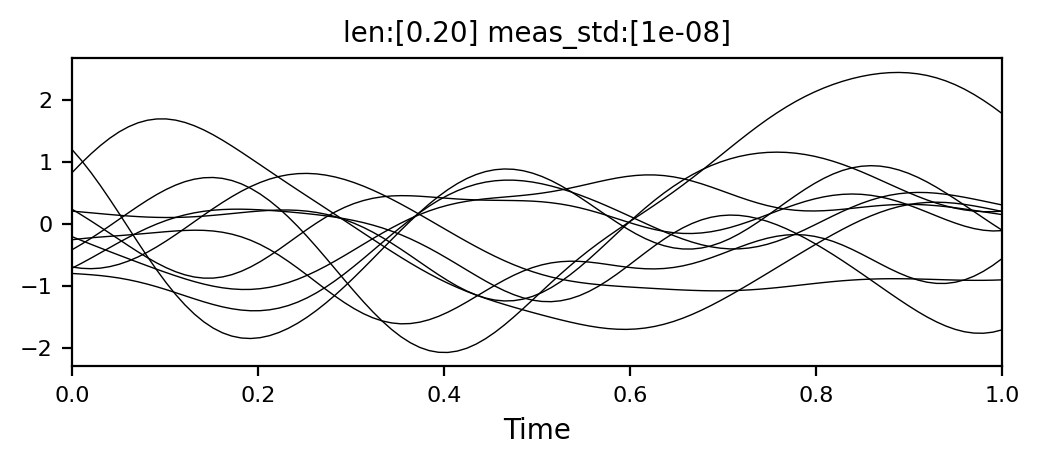

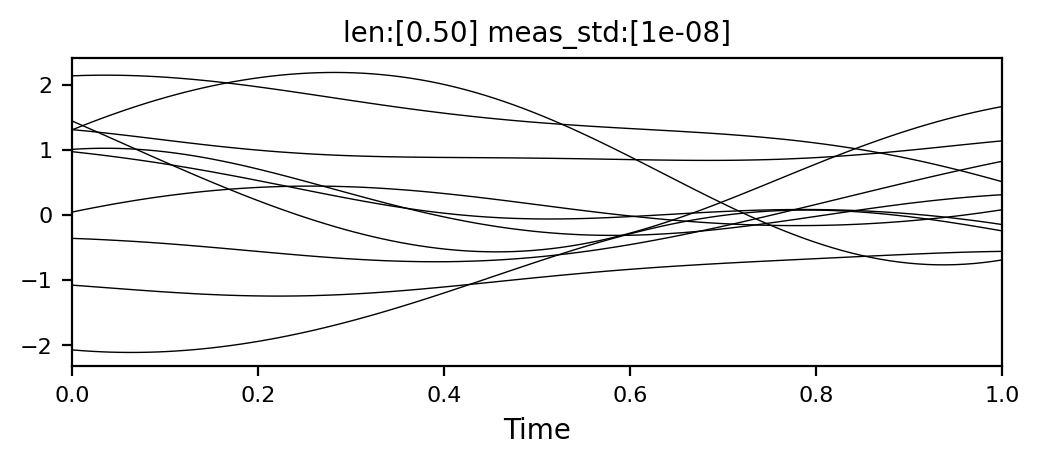

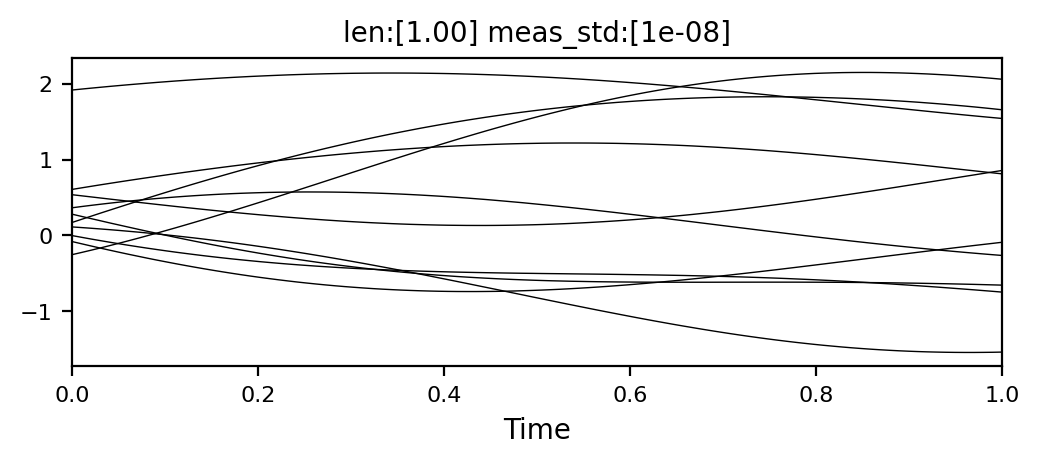

In [15]:
times = np.linspace(start=0.0,stop=1.0,num=100).reshape((-1,1)) # [L x 1]
for hyp_len,meas_std in [(0.2,1e-8),(0.5,1e-8),(1.0,1e-8)]:
    n_traj = 10
    trajs_hbm = hbm_sampler(
        times    = times,
        hyp_gain = 1.0,
        hyp_len  = hyp_len,
        meas_std = meas_std,
        n_traj   = n_traj
    )
    plt.figure(figsize=(6,2))
    h_hmb = plt.plot(times,trajs_hbm,ls='-',color='k',lw=1/2)
    plt.xlim([0.0,1.0]);
    plt.xlabel('Time',fontsize=10); 
    plt.title('len:[%.2f] meas_std:[%.e]'%(hyp_len,meas_std),fontsize=10)
    plt.show()